In [1]:
# paths and info
import os, sys
homeDir = os.environ['HOMEPATH']
moLibsDir = os.path.join(homeDir, "Documents", "Dymola")

# give the path to directory where package.mo is stored
moLibs = [os.path.normpath("C:\Program Files\Dymola 2019\Modelica\Library\Modelica 3.2.2"),
          os.path.normpath("C:\Program Files\Dymola 2019\Modelica\Library\ModelicaServices 3.2.2"),
          os.path.join(moLibsDir, "HelmholtzMedia", "HelmholtzMedia"),
         ]

print(sys.version)
print(all(os.path.isfile(os.path.join(moLib, "package.mo")) for moLib in moLibs))
print(os.getcwd())

2.7.13 (v2.7.13:a06454b1afa1, Dec 17 2016, 20:53:40) [MSC v.1500 64 bit (AMD64)]
True
C:\Users\matthis.thorade\Documents\git\jupyterNotebooks\OCT


In [3]:
# compile model to fmu
from pymodelica import compile_fmu
model_name = 'HelmholtzMedia.Examples.BranchingDynamicPipes'
my_fmu = compile_fmu(model_name, moLibs, compiler= 'modelica', compiler_options={"msvs_version":"2017"} , target='me', version='2.0', platform='win64', compile_to='.', compiler_log_level='debug:log.txt', jvm_args='-Xmx8g') 

In [7]:
# simulate the fmu and store results
from pyfmi import load_fmu
myModel = load_fmu(my_fmu)

opts = myModel.simulate_options()
opts['solver'] = "CVode"
opts['ncp'] = 500
opts['result_handling']="file"
opts["CVode_options"]['discr'] = 'BDF'
opts['CVode_options']['iter'] = 'Newton'
opts['CVode_options']['maxord'] = 5
opts['CVode_options']['atol'] = 1e-6
opts['CVode_options']['rtol'] = 1e-6

res = myModel.simulate(start_time=0, final_time=1, options=opts)

Final Run Statistics: --- e-01

 Number of steps                                 : 368
 Number of function evaluations                  : 436
 Number of Jacobian evaluations                  : 12
 Number of function eval. due to Jacobian eval.  : 744
 Number of error test failures                   : 3
 Number of nonlinear iterations                  : 408
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 437
 Number of state events                          : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 38.0351912029 seconds.


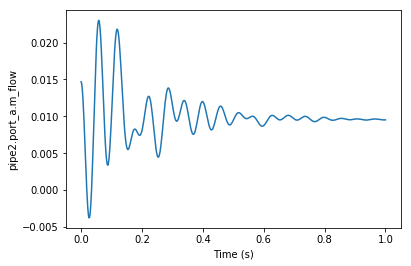

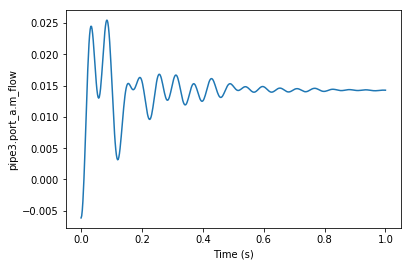

In [8]:
# plotting of the results
import matplotlib.pyplot as plt

time = 'time'
names = ['pipe2.port_a.m_flow', 'pipe3.port_a.m_flow']

x = res[time]
for name in names:
    y = res[name]
    plt.plot(x, y)
    plt.xlabel('Time (s)')
    plt.ylabel(name)
    plt.savefig(name.replace('.','_')+'.pdf')
    plt.show()